<a href="https://colab.research.google.com/github/skaria76/intro-ml-course-winter2025/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import BCELoss
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn


# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving Datathon #3 Dataset - HAD7001 (1).csv to Datathon #3 Dataset - HAD7001 (1).csv


In [ ]:
df= pd.read_csv('Datathon #3 Dataset - HAD7001 (1).csv')
df;

In [ ]:
sample_var= ["age", "bmi", "elective_surgery", "gender", "ethnicity",
             "pre_icu_los_days", "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "leukemia", "lymphoma",
             "h1_diasbp_noninvasive_min", "h1_heartrate_max", "h1_resprate_max",
             "h1_resprate_min", "h1_temp_max", "h1_temp_min", "hospital_death", "readmission_status",

]

df=df[sample_var]
df;

In [ ]:
pd.set_option('display.max_rows', None)
missing_per_column = df.isnull().sum()
print(missing_per_column)

age                           4228
bmi                           3429
elective_surgery                 0
gender                          25
ethnicity                     1395
pre_icu_los_days                 0
aids                           715
cirrhosis                      715
diabetes_mellitus              715
hepatic_failure                715
leukemia                       715
lymphoma                       715
h1_diasbp_noninvasive_min     7350
h1_heartrate_max              2790
h1_resprate_max               4357
h1_resprate_min               4357
h1_temp_max                  21732
h1_temp_min                  21732
hospital_death                   0
readmission_status               0
dtype: int64


In [ ]:
df.drop(columns=['h1_diasbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min'], inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)
missing_per_column = df.isnull().sum()
print(missing_per_column)

age                   4228
bmi                   3429
elective_surgery         0
gender                  25
ethnicity             1395
pre_icu_los_days         0
aids                   715
cirrhosis              715
diabetes_mellitus      715
hepatic_failure        715
leukemia               715
lymphoma               715
h1_heartrate_max      2790
h1_resprate_max       4357
h1_resprate_min       4357
hospital_death           0
readmission_status       0
dtype: int64


In [ ]:
df.dtypes

,0
age,float64
bmi,float64
elective_surgery,int64
gender,object
ethnicity,object
pre_icu_los_days,float64
aids,float64
cirrhosis,float64
diabetes_mellitus,float64
hepatic_failure,float64


In [ ]:
ethnicity_counts = df['ethnicity'].value_counts()
ethnicity_counts


,count
ethnicity,
Caucasian,70684
African American,9547
Other/Unknown,4374
Hispanic,3796
Asian,1129
Native American,788


In [ ]:
# Numerically encode values in the ethnicity column
df['ethnicity'] = (df['ethnicity'].map({'Caucasian': 0, 'African American': 1,'Hispanic': 2, 'Asian': 3, 'Other/Unknown': 4,'Native American': 4}).fillna(4))


In [ ]:
# Numerically encode values in the Gender column
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

In [ ]:
#Mode imputation of comorbidites
columns_to_impute = ['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'leukemia', 'lymphoma']

# Calculate the mode for each column individually
for column in columns_to_impute:
    mode_value = df[column].mode()[0]  # Get the mode of the current column
    df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode

<ipython-input-25-ae58bf70d308>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode


In [ ]:
description= df.describe()
description

,age,bmi,elective_surgery,gender,ethnicity,pre_icu_los_days,aids,cirrhosis,diabetes_mellitus,hepatic_failure,leukemia,lymphoma,h1_heartrate_max,h1_resprate_max,h1_resprate_min,hospital_death,readmission_status
count,87485.000000,88284.000000,91713.000000,91688.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,88923.000000,87356.000000,87356.000000,91713.000000,91713.0
mean,62.309516,29.185818,0.183736,0.539536,0.509786,0.835766,0.000850,0.015570,0.223436,0.012888,0.007011,0.004100,92.229198,22.633614,17.211525,0.086302,0.0
std,16.775119,8.275142,0.387271,0.498437,1.124498,2.487756,0.029151,0.123806,0.416551,0.112792,0.083438,0.063898,21.823704,7.515043,6.072588,0.280811,0.0
min,16.000000,14.844926,0.000000,0.000000,0.000000,-24.947222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,10.000000,0.000000,0.000000,0.0
25%,52.000000,23.641975,0.000000,0.000000,0.000000,0.035417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,18.000000,14.000000,0.000000,0.0
50%,65.000000,27.654655,0.000000,1.000000,0.000000,0.138889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,21.000000,16.000000,0.000000,0.0
75%,75.000000,32.930206,0.000000,1.000000,0.000000,0.409028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,26.000000,20.000000,0.000000,0.0
max,89.000000,67.814990,1.000000,1.000000,4.000000,159.090972,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,164.000000,59.000000,189.000000,1.000000,0.0


In [ ]:
#Remove improbable BMI values
df = df[(df['bmi'] >= 17) & (df['bmi'] <= 60)]


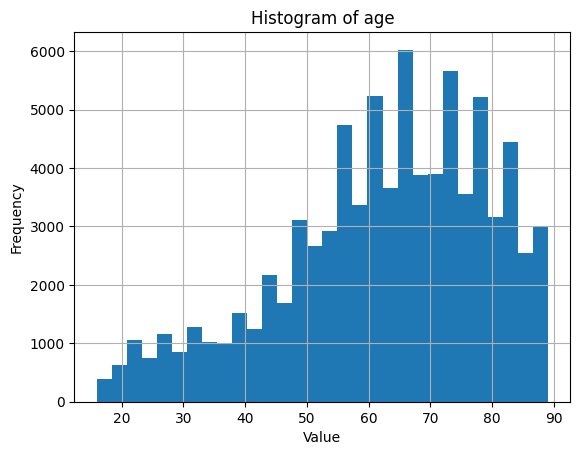

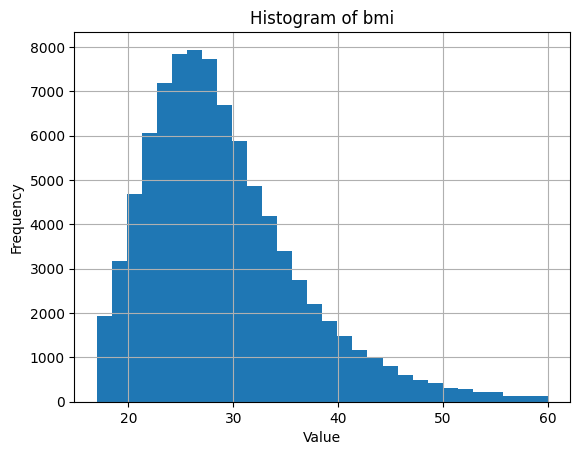

In [ ]:
df['age'].hist(bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

df['bmi'].hist(bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of bmi')
plt.show()

In [ ]:
# Mean imputation for 'age'
df['age'].fillna(df['age'].mean(), inplace=True)

# Median imputation for 'bmi'
df['bmi'].fillna(df['bmi'].median(), inplace=True)


<ipython-input-16-f70b4db11f85>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-16-f70b4db11f85>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Drop rows with any missing values (resp rate and heart rate)
df_complete = df.dropna()

# Display the DataFrame with complete cases
df_complete;


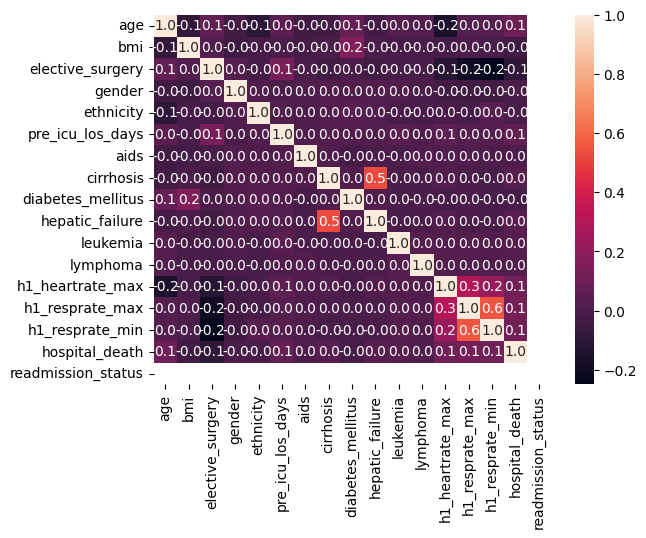

In [ ]:
corr_m=df_complete.corr()
sns.heatmap(corr_m, annot=True, fmt=".1f")
plt.show()

In [ ]:
# Randomly sample 70% of the data for training
train_data = df_complete.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = df_complete.drop(train_data.index)

# Check the mean of the 'hospital_death' column in both training and testing data
print("train data target mean:", train_data['hospital_death'].mean())
print("test data target mean:", test_data['hospital_death'].mean())

# Data Preparation

# Extract the 'hospital_death' column as the target variable for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

# Extract the features (excluding 'hospital_death') for training and testing
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

train data target mean: 0.08628742809380992
test data target mean: 0.08776290630975143


In [ ]:
# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 16
number_of_hidden_units = 5
epochs = 250
learning_rate = 0.01
batch_size = 32
landa = 0.01  # Regularization term (lambda)

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Calculate pos_weight based on class imbalance
num_negative_samples = len(Y_train[Y_train == 0])
num_positive_samples = len(Y_train[Y_train == 1])
pos_weight = num_negative_samples / num_positive_samples

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),
    nn.Tanh(),
    nn.Linear(number_of_hidden_units, 1)
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCEWithLogitsLoss(pos_weight=t.tensor(pos_weight))

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/250 ---> Train Accuracy: 0.7973023653030396, Validation Accuracy: 0.7955257892608643
Epoch 1/250 ---> Train Accuracy: 0.8024976849555969, Validation Accuracy: 0.7989674806594849
Epoch 2/250 ---> Train Accuracy: 0.7901076674461365, Validation Accuracy: 0.7876099348068237
Epoch 3/250 ---> Train Accuracy: 0.7817165851593018, Validation Accuracy: 0.7779732346534729
Epoch 4/250 ---> Train Accuracy: 0.7681301832199097, Validation Accuracy: 0.7662715315818787
Epoch 5/250 ---> Train Accuracy: 0.7627710103988647, Validation Accuracy: 0.7601147294044495
Epoch 6/250 ---> Train Accuracy: 0.7582313418388367, Validation Accuracy: 0.7574378848075867
Epoch 7/250 ---> Train Accuracy: 0.8126096129417419, Validation Accuracy: 0.811013400554657
Epoch 8/250 ---> Train Accuracy: 0.7249454855918884, Validation Accuracy: 0.7240535616874695
Epoch 9/250 ---> Train Accuracy: 0.796663224697113, Validation Accuracy: 0.7940726280212402
Epoch 10/250 ---> Train Accuracy: 0.813019335269928, Validation Accuracy

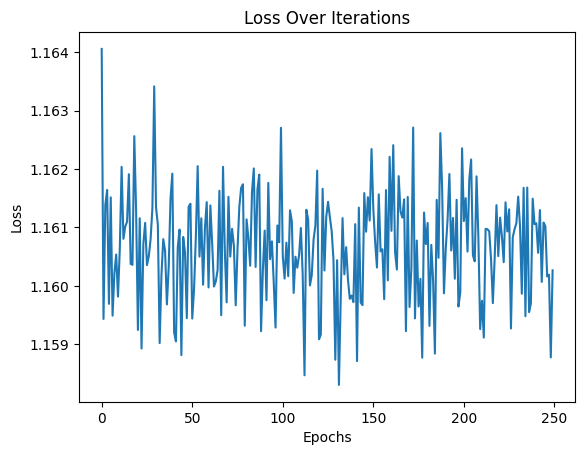

In [ ]:
# Plotting the loss values recorded during training
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()

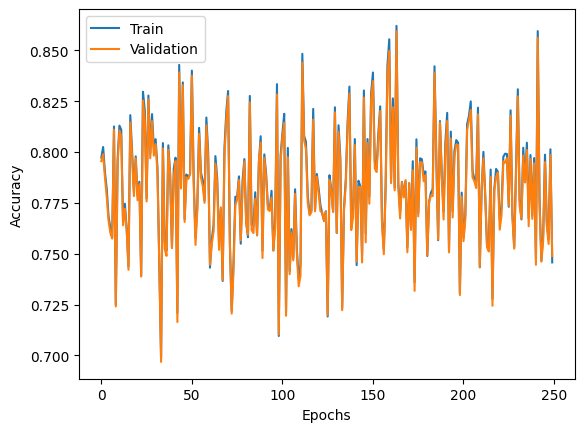

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Confusion Matrix:
[[18381  5474]
 [ 1094  1201]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85     23855
         1.0       0.18      0.52      0.27      2295

    accuracy                           0.75     26150
   macro avg       0.56      0.65      0.56     26150
weighted avg       0.88      0.75      0.80     26150



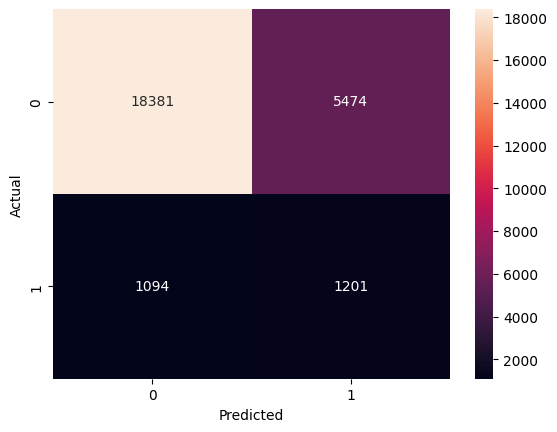

In [ ]:
model.eval()

# Use the model to make predictions on the test data (X_test_tensor)
with t.no_grad():
    reg_probs_test = model(X_test_tensor)
    reg_y_test_pred = (reg_probs_test >= 0.5).type(t.LongTensor).view(-1)

y_test_pred_np = reg_y_test_pred.cpu().numpy()
y_test_true_np = Y_test_tensor.cpu().numpy()

# Evaluate the model
conf_matrix = confusion_matrix(y_test_true_np, y_test_pred_np)
class_report = classification_report(y_test_true_np, y_test_pred_np)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC Score: 0.6469209169962495


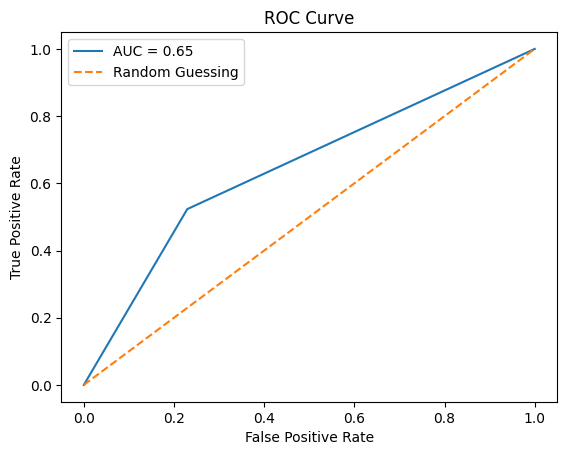

In [ ]:
# Calculate the AUC score
auc = roc_auc_score(y_test_true_np, y_test_pred_np)
print(f"AUC Score: {auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_true_np, y_test_pred_np)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Defining the parameters
number_of_input_features = 16
number_of_hidden_units = 5
epochs = 500
learning_rate = 0.01
batch_size = 32

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Calculate pos_weight based on class imbalance
num_negative_samples = len(Y_train[Y_train == 0])
num_positive_samples = len(Y_train[Y_train == 1])
pos_weight = num_negative_samples / num_positive_samples

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),
    nn.Tanh(),
    nn.Linear(number_of_hidden_units, 1)
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCEWithLogitsLoss(pos_weight=t.tensor(pos_weight))

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/500 ---> train_accuracy : 0.776226282119751 , validation_accuracy : 0.7733460664749146
epoch 1/500 ---> train_accuracy : 0.769785463809967 , validation_accuracy : 0.7646271586418152
epoch 2/500 ---> train_accuracy : 0.7681793570518494 , validation_accuracy : 0.7640535235404968
epoch 3/500 ---> train_accuracy : 0.7990396022796631 , validation_accuracy : 0.7936902642250061
epoch 4/500 ---> train_accuracy : 0.7919760346412659 , validation_accuracy : 0.7858508825302124
epoch 5/500 ---> train_accuracy : 0.7482832670211792 , validation_accuracy : 0.741950273513794
epoch 6/500 ---> train_accuracy : 0.7660651803016663 , validation_accuracy : 0.7594646215438843
epoch 7/500 ---> train_accuracy : 0.7613452076911926 , validation_accuracy : 0.7530401349067688
epoch 8/500 ---> train_accuracy : 0.7876657247543335 , validation_accuracy : 0.7801529765129089
epoch 9/500 ---> train_accuracy : 0.7394660711288452 , validation_accuracy : 0.7332695722579956
epoch 10/500 ---> train_accuracy : 0.816428

Text(0, 0.5, 'Accuracy')

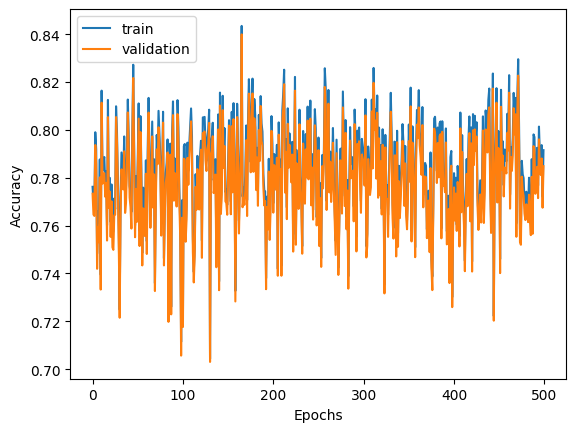

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Confusion Matrix:
[[19535  4320]
 [ 1306   989]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.87     23855
         1.0       0.19      0.43      0.26      2295

    accuracy                           0.78     26150
   macro avg       0.56      0.62      0.57     26150
weighted avg       0.87      0.78      0.82     26150



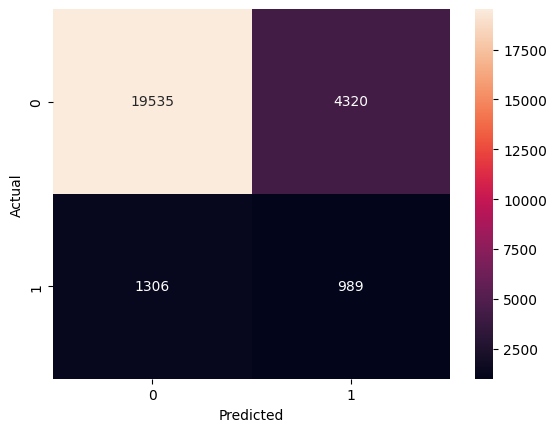

In [ ]:
model.eval()

# Use the model to make predictions on the test data (X_test_tensor)
with t.no_grad():
    probs_test = model(X_test_tensor)
    y_test_pred = (probs_test >= 0.5).type(t.LongTensor).view(-1)

y_test_pred_np1 = y_test_pred.cpu().numpy()
y_test_true_np1 = Y_test_tensor.cpu().numpy()

# Evaluate the model
conf_matrix = confusion_matrix(y_test_true_np1, y_test_pred_np1)
class_report = classification_report(y_test_true_np1, y_test_pred_np1)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC Score: 0.6249213544613449


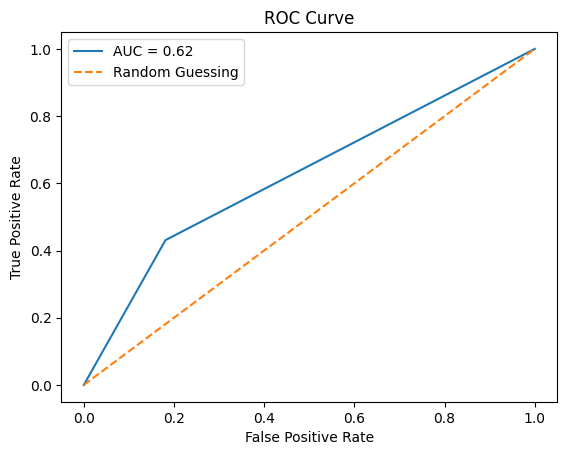

In [ ]:
# Calculate the AUC score
auc = roc_auc_score(y_test_true_np1, y_test_pred_np1)
print(f"AUC Score: {auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_true_np1, y_test_pred_np1)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()